<a href="https://colab.research.google.com/github/wangyangang/lihongyi_ml/blob/main/chapter1_primary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 李宏毅机器学习 第一章

## 创建Tensor

In [3]:
import torch

In [4]:
x = torch.tensor([[1, -1], [-1, 1]])
x

tensor([[ 1, -1],
        [-1,  1]])

In [5]:
import numpy as np

x = torch.from_numpy(np.array([[1, -1], [-1, 1]]))
x

tensor([[ 1, -1],
        [-1,  1]])

### 创建全为0的tensor

In [6]:
x = torch.zeros([2, 2])
x

tensor([[0., 0.],
        [0., 0.]])

In [7]:
x = torch.ones([1, 2, 5])
x

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [8]:
## 基本运算
x = torch.ones([2, 3])
y = torch.tensor([[1, 2, 3], [4, 5, 6]])
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
y

tensor([[1, 2, 3],
        [4, 5, 6]])

In [10]:
## 加法
x + y

tensor([[2., 3., 4.],
        [5., 6., 7.]])

In [11]:
## 减法
x - y

tensor([[ 0., -1., -2.],
        [-3., -4., -5.]])

In [12]:
## pow(平方)
x.pow(2)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [13]:
y.pow(2)

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [14]:
# sum
x.sum()

tensor(6.)

In [15]:
y.sum()

tensor(21)

In [16]:
# mean
x.mean()

tensor(1.)

In [17]:
# y.mean()会报错，搜了一下说改为torch.Tensor()进行创建就可以。
torch.Tensor([1, 2]).mean()

tensor(1.5000)

In [18]:
# 转置
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [19]:
# 第0个维度和第一个维度进行互换
x.transpose(0, 1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [20]:
x.shape

torch.Size([2, 3])

In [21]:
x.transpose(0, 1).shape

torch.Size([3, 2])

In [22]:
# 移除某个维度
x = torch.zeros([1, 2, 3])
x

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])

In [23]:
x.shape

torch.Size([1, 2, 3])

In [24]:
x = x.squeeze(0)
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [25]:
x.shape

torch.Size([2, 3])

In [26]:
# 加一个维度
x = torch.zeros([2, 3])
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [27]:
x.shape

torch.Size([2, 3])

In [28]:
x = x.unsqueeze(1)
x

tensor([[[0., 0., 0.]],

        [[0., 0., 0.]]])

In [29]:
x.shape

torch.Size([2, 1, 3])

In [30]:
# 合并tansor
x = torch.zeros([2, 1, 3])
x

tensor([[[0., 0., 0.]],

        [[0., 0., 0.]]])

In [31]:
y = torch.zeros([2, 2, 3])
y

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [32]:
z = torch.zeros([2, 3, 3])
z

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [33]:
w = torch.cat([x, y, z], dim=1)
w

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [34]:
w.shape

torch.Size([2, 6, 3])

示例如下：

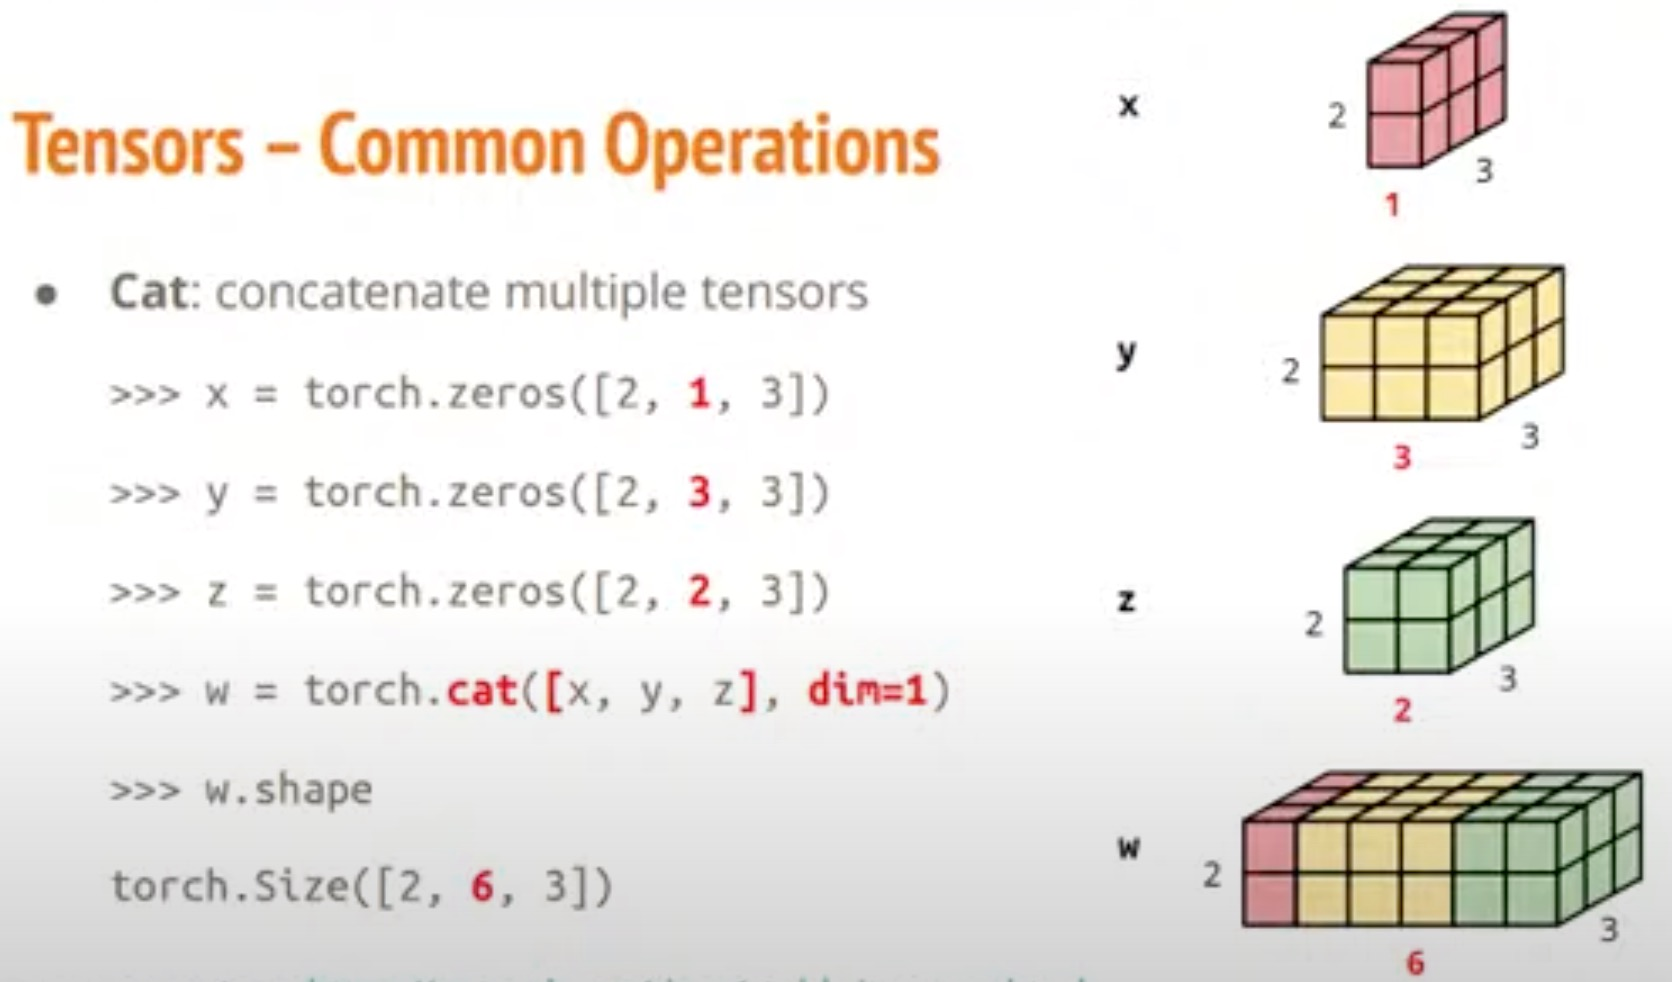

In [35]:
# 查看数据类型
x.dtype

torch.float32

In [36]:
y.dtype

torch.float32

In [37]:
# 移到cpu
# x = x.to('cpu')
# 移到gpu
# x = x.to('cuda')

In [38]:
# 检查GPU是否可用
torch.cuda.is_available()

True

In [40]:
# 计算梯度
x = torch.tensor([[1., 0.], [-1., 1.]], requires_grad=True)
z = x.pow(2).sum()
z.backward()
x.grad

tensor([[ 2.,  0.],
        [-2.,  2.]])

In [42]:
# torch.nn - Network Parameters
# Linear Layer(Fully connected layer)
layer = torch.nn.Linear(32, 64)
layer.weight.shape

torch.Size([64, 32])

In [44]:
layer.bias.shape

torch.Size([64])

In [45]:
# torch.nn - Build your own neural network
import torch.nn as nn

class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(10, 32),
        nn.Sigmod(),
        nn.Linear(32, 1)
    )
  def forward(self, x):
    return self.net(x)

class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(10, 32)
    self.layer2 = nn.Sigmod()
    self.layer3 = nn.Linear(32, 1)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    return out


In [46]:
## 常用的Loss Function
### Mean Squared Error(for regression tasks)
criterion = nn.MSELoss()

In [47]:
### Cross Entropy(for classification tasks)
criterion = nn.CrossEntropyLoss()

In [48]:
## loss = criterion(model_output, expected_value)